# Binary Classification: Wine Fraud Detector

Building and evaluating a binary classifier model using wine dataset

## Imports

In [1]:
# Ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data, Data Preprocessing, Data Visualization

In [3]:
# Read CSV
df = pd.read_csv('../data/wine_fraud.csv')

In [4]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [7]:
# Check for any null or na values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [8]:
# Unique values in the target column
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

In [9]:
df['quality'].value_counts()

quality
Legit    6251
Fraud     246
Name: count, dtype: int64

In [10]:
df['type'].unique()

array(['red', 'white'], dtype=object)

In [11]:
df['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

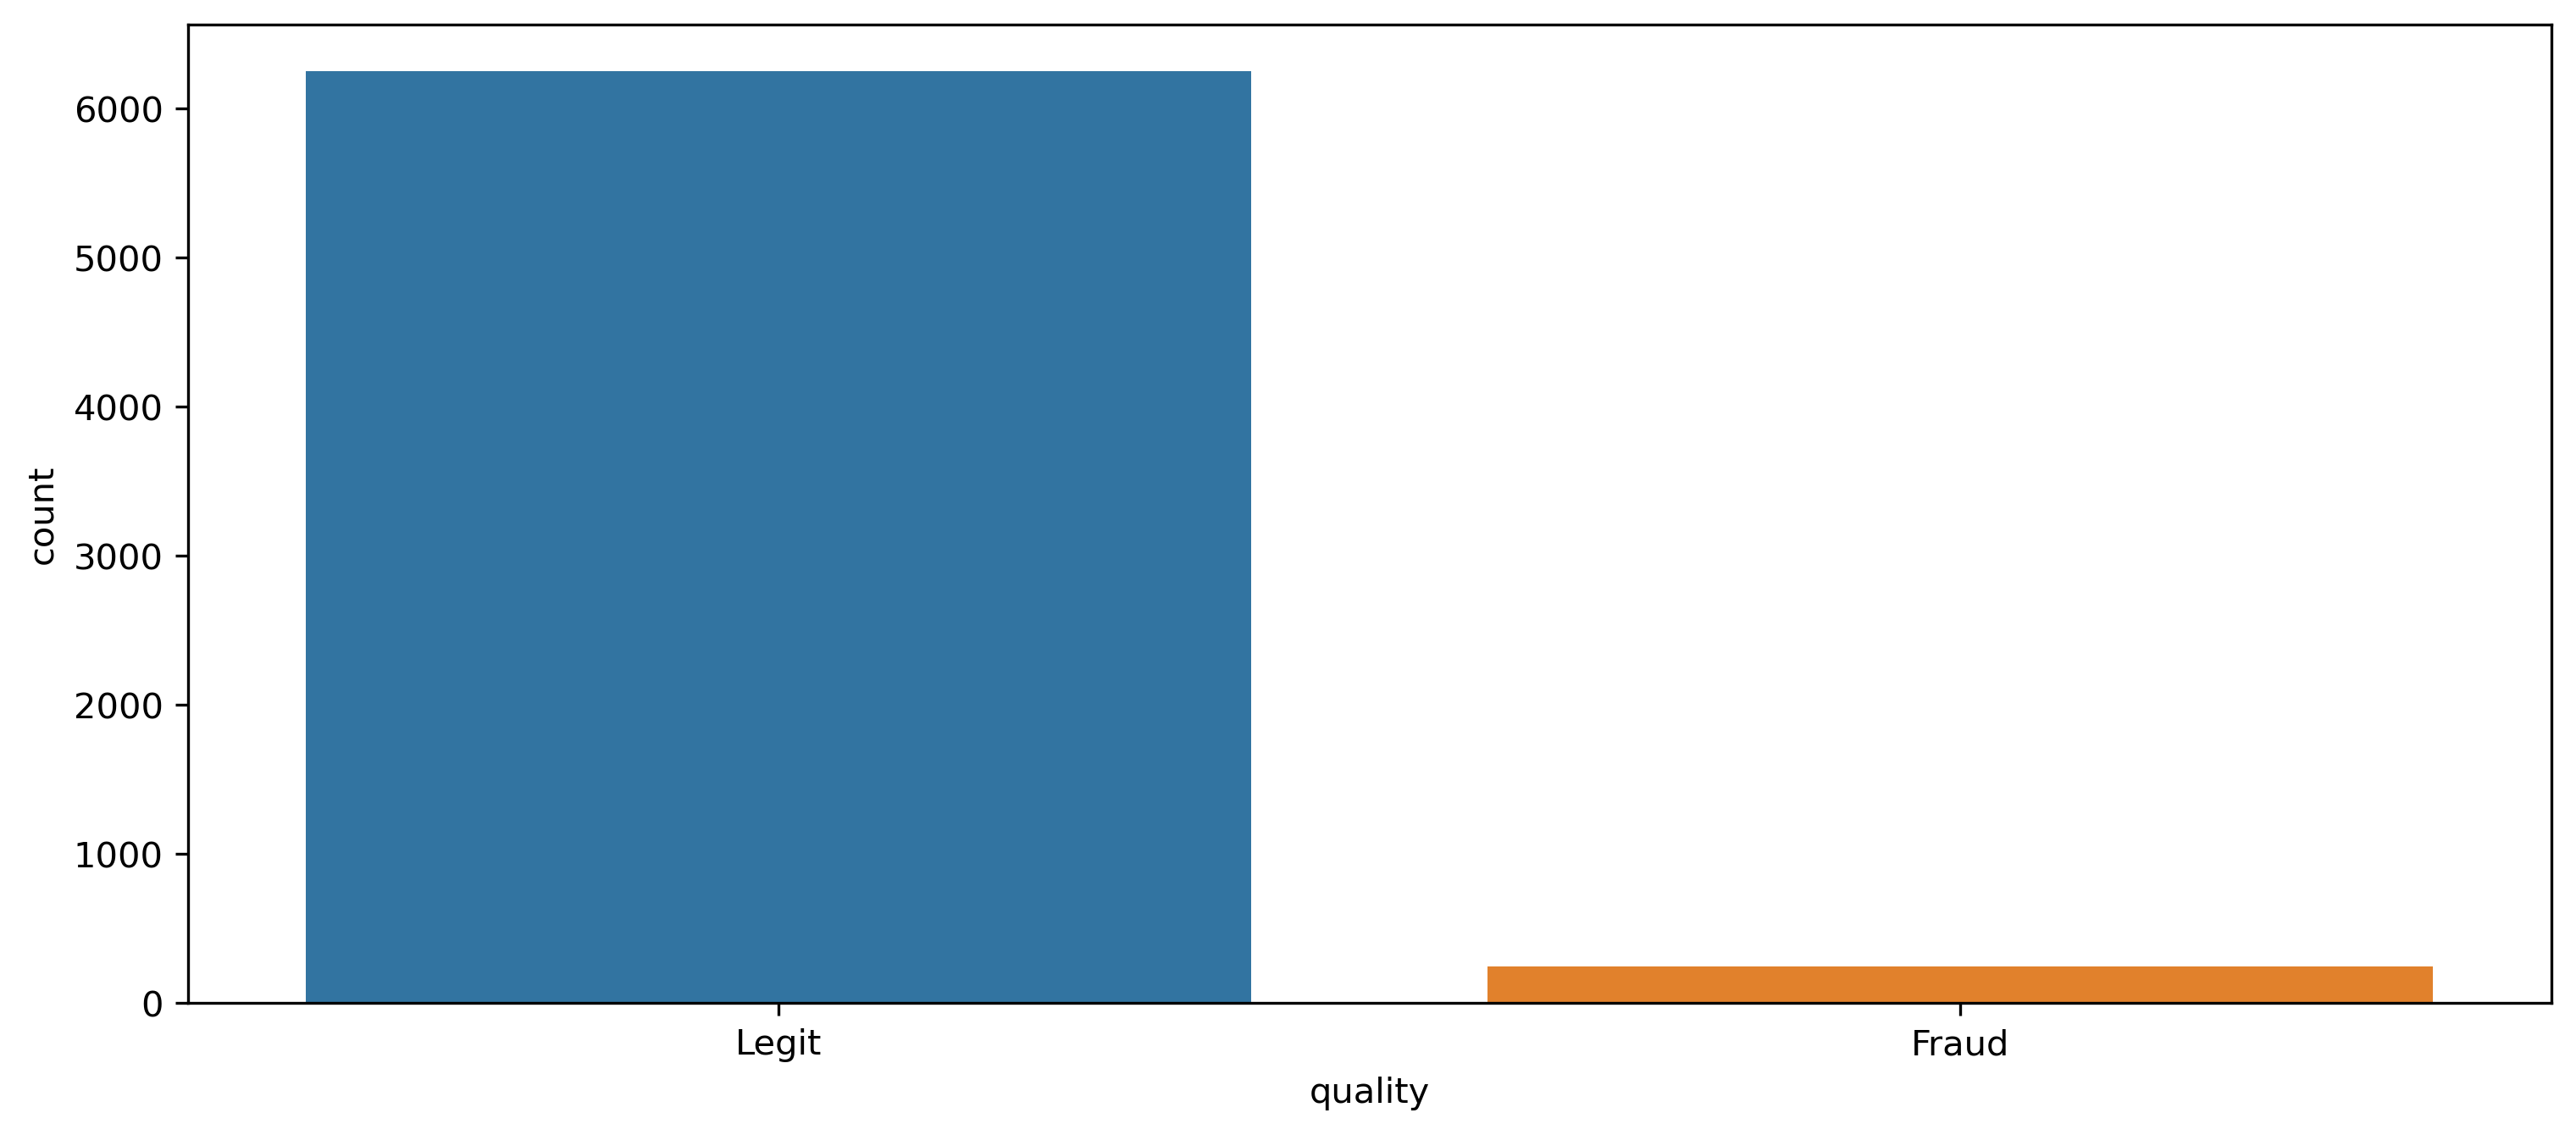

In [12]:
# Create a count plot for Quality column
plt.figure(figsize=(12, 5), dpi=300)
sns.countplot(data=df, x='quality')
plt.savefig('../assets/visualization/quality_countplot.png')

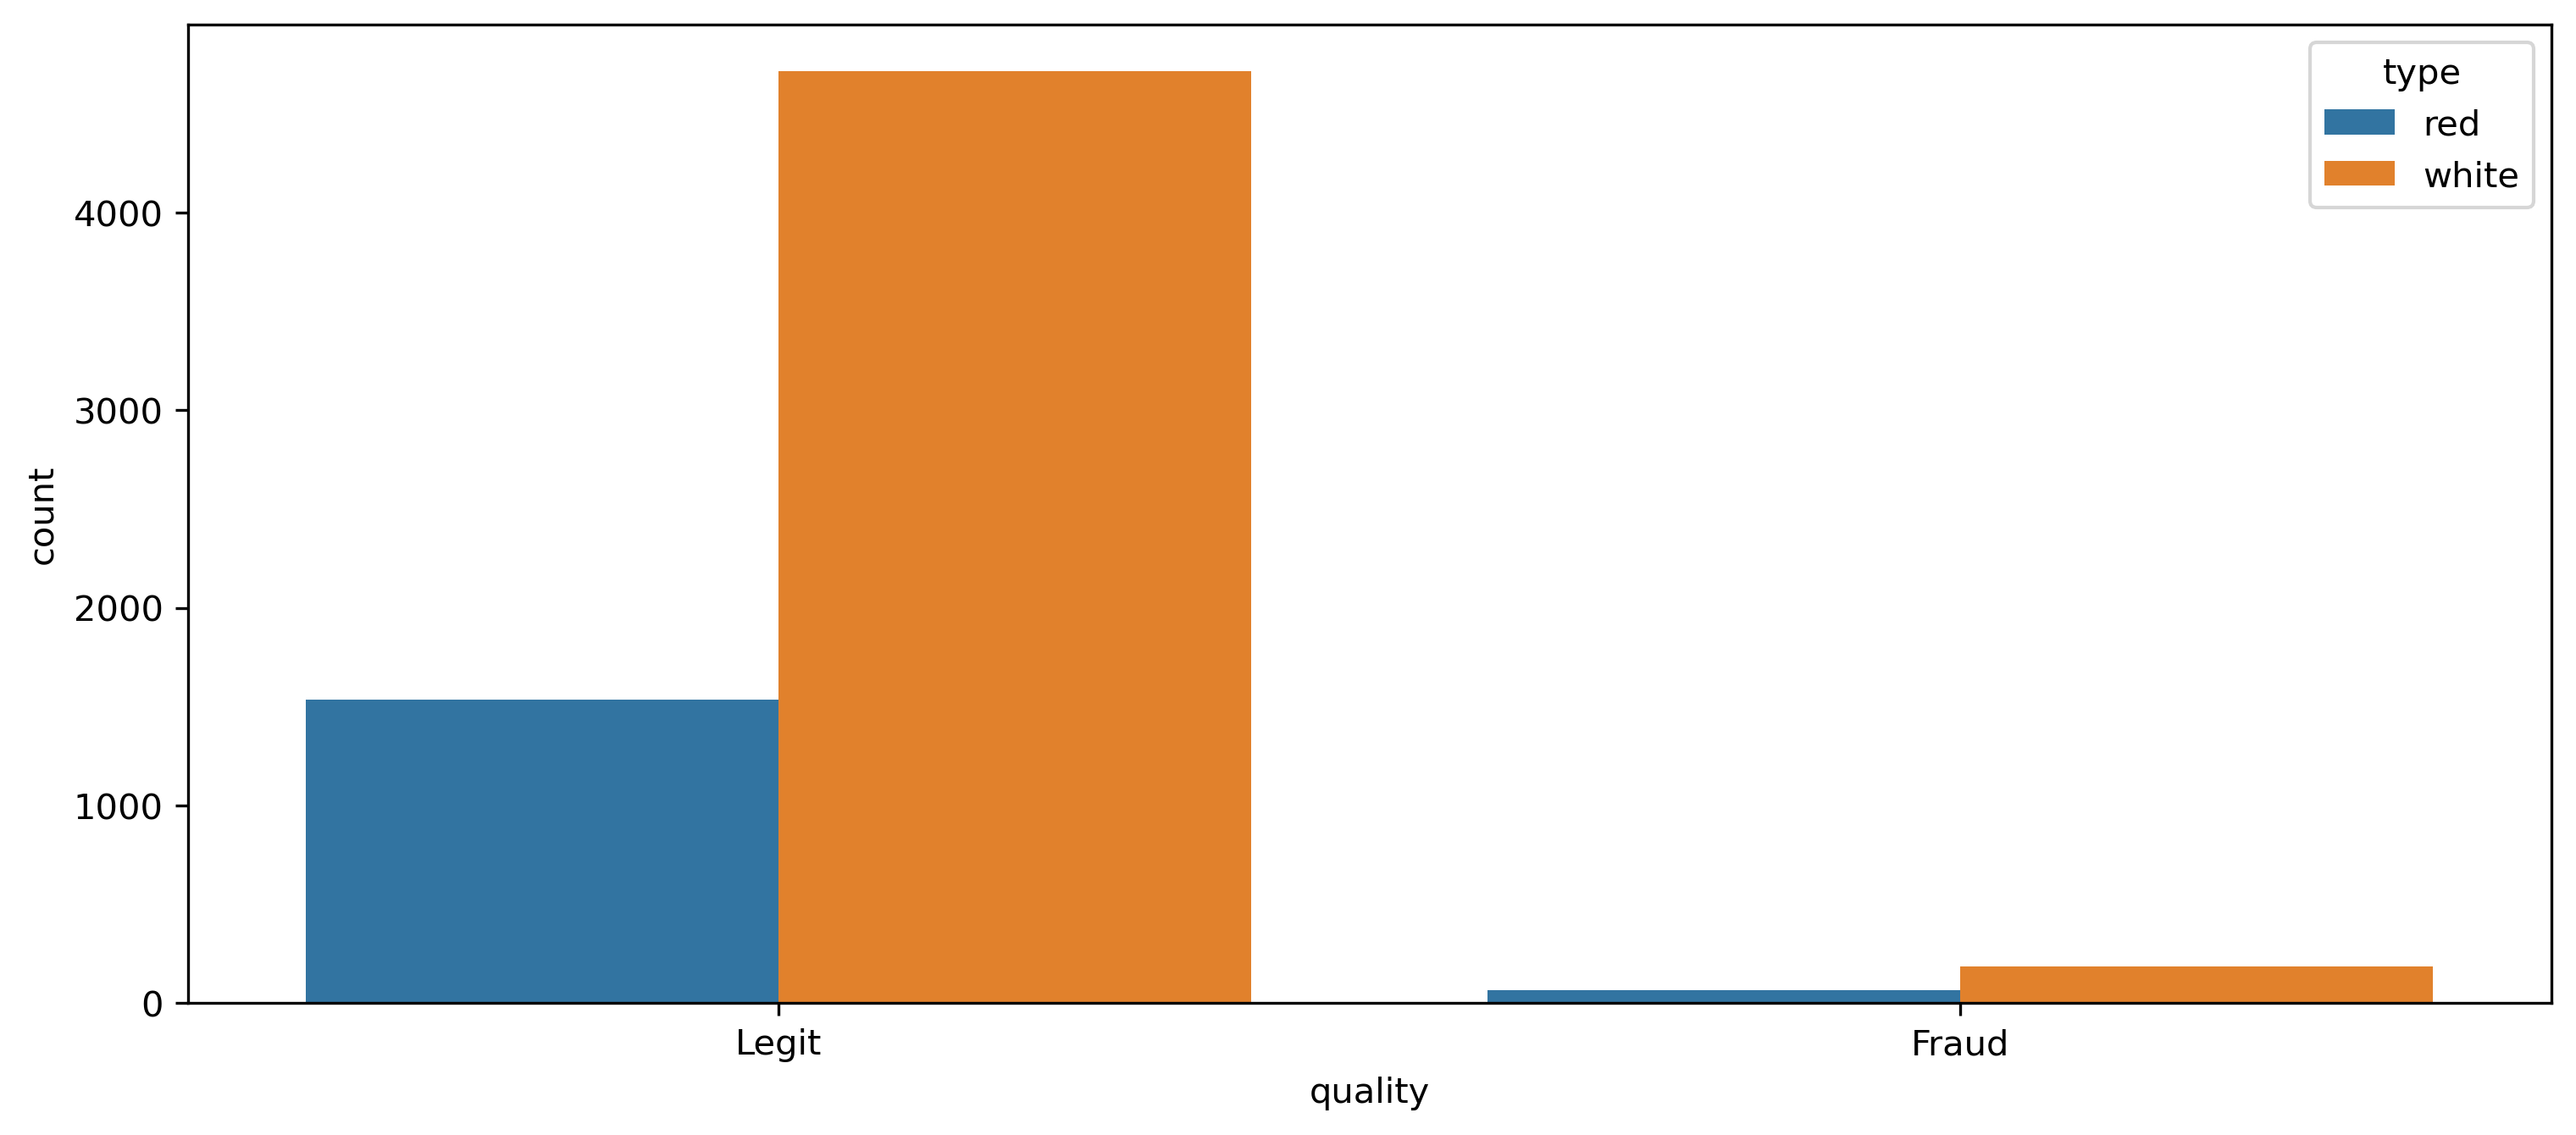

In [13]:
# Create a count plot for Quality column and hue 
plt.figure(figsize=(12, 5), dpi=300)
sns.countplot(data=df, x='quality', hue='type')
plt.savefig('../assets/visualization/quality_type_countplot.png')

In [14]:
# What % of red wines are fraud ? 
red_wines = df[df['type'] == 'red']

red_frauds = red_wines[red_wines['quality'] == 'Fraud']

100 * len(red_frauds) / len(red_wines)

3.9399624765478425

In [15]:
#What % of white wines are fraud ?
white_wines = df[df['type'] == 'white']

white_frauds = white_wines[white_wines['quality'] == 'Fraud']

100 * len(white_frauds) / len(white_wines)

3.736218864842793

In [16]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red


In [17]:
df['Fraud'] = df['quality'].map({'Legit': 0, 'Fraud': 1})

In [18]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Fraud
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red,0


In [19]:
# Correlation
correlation_matrix = df.drop(columns=['quality', 'type'], axis=1).corr()

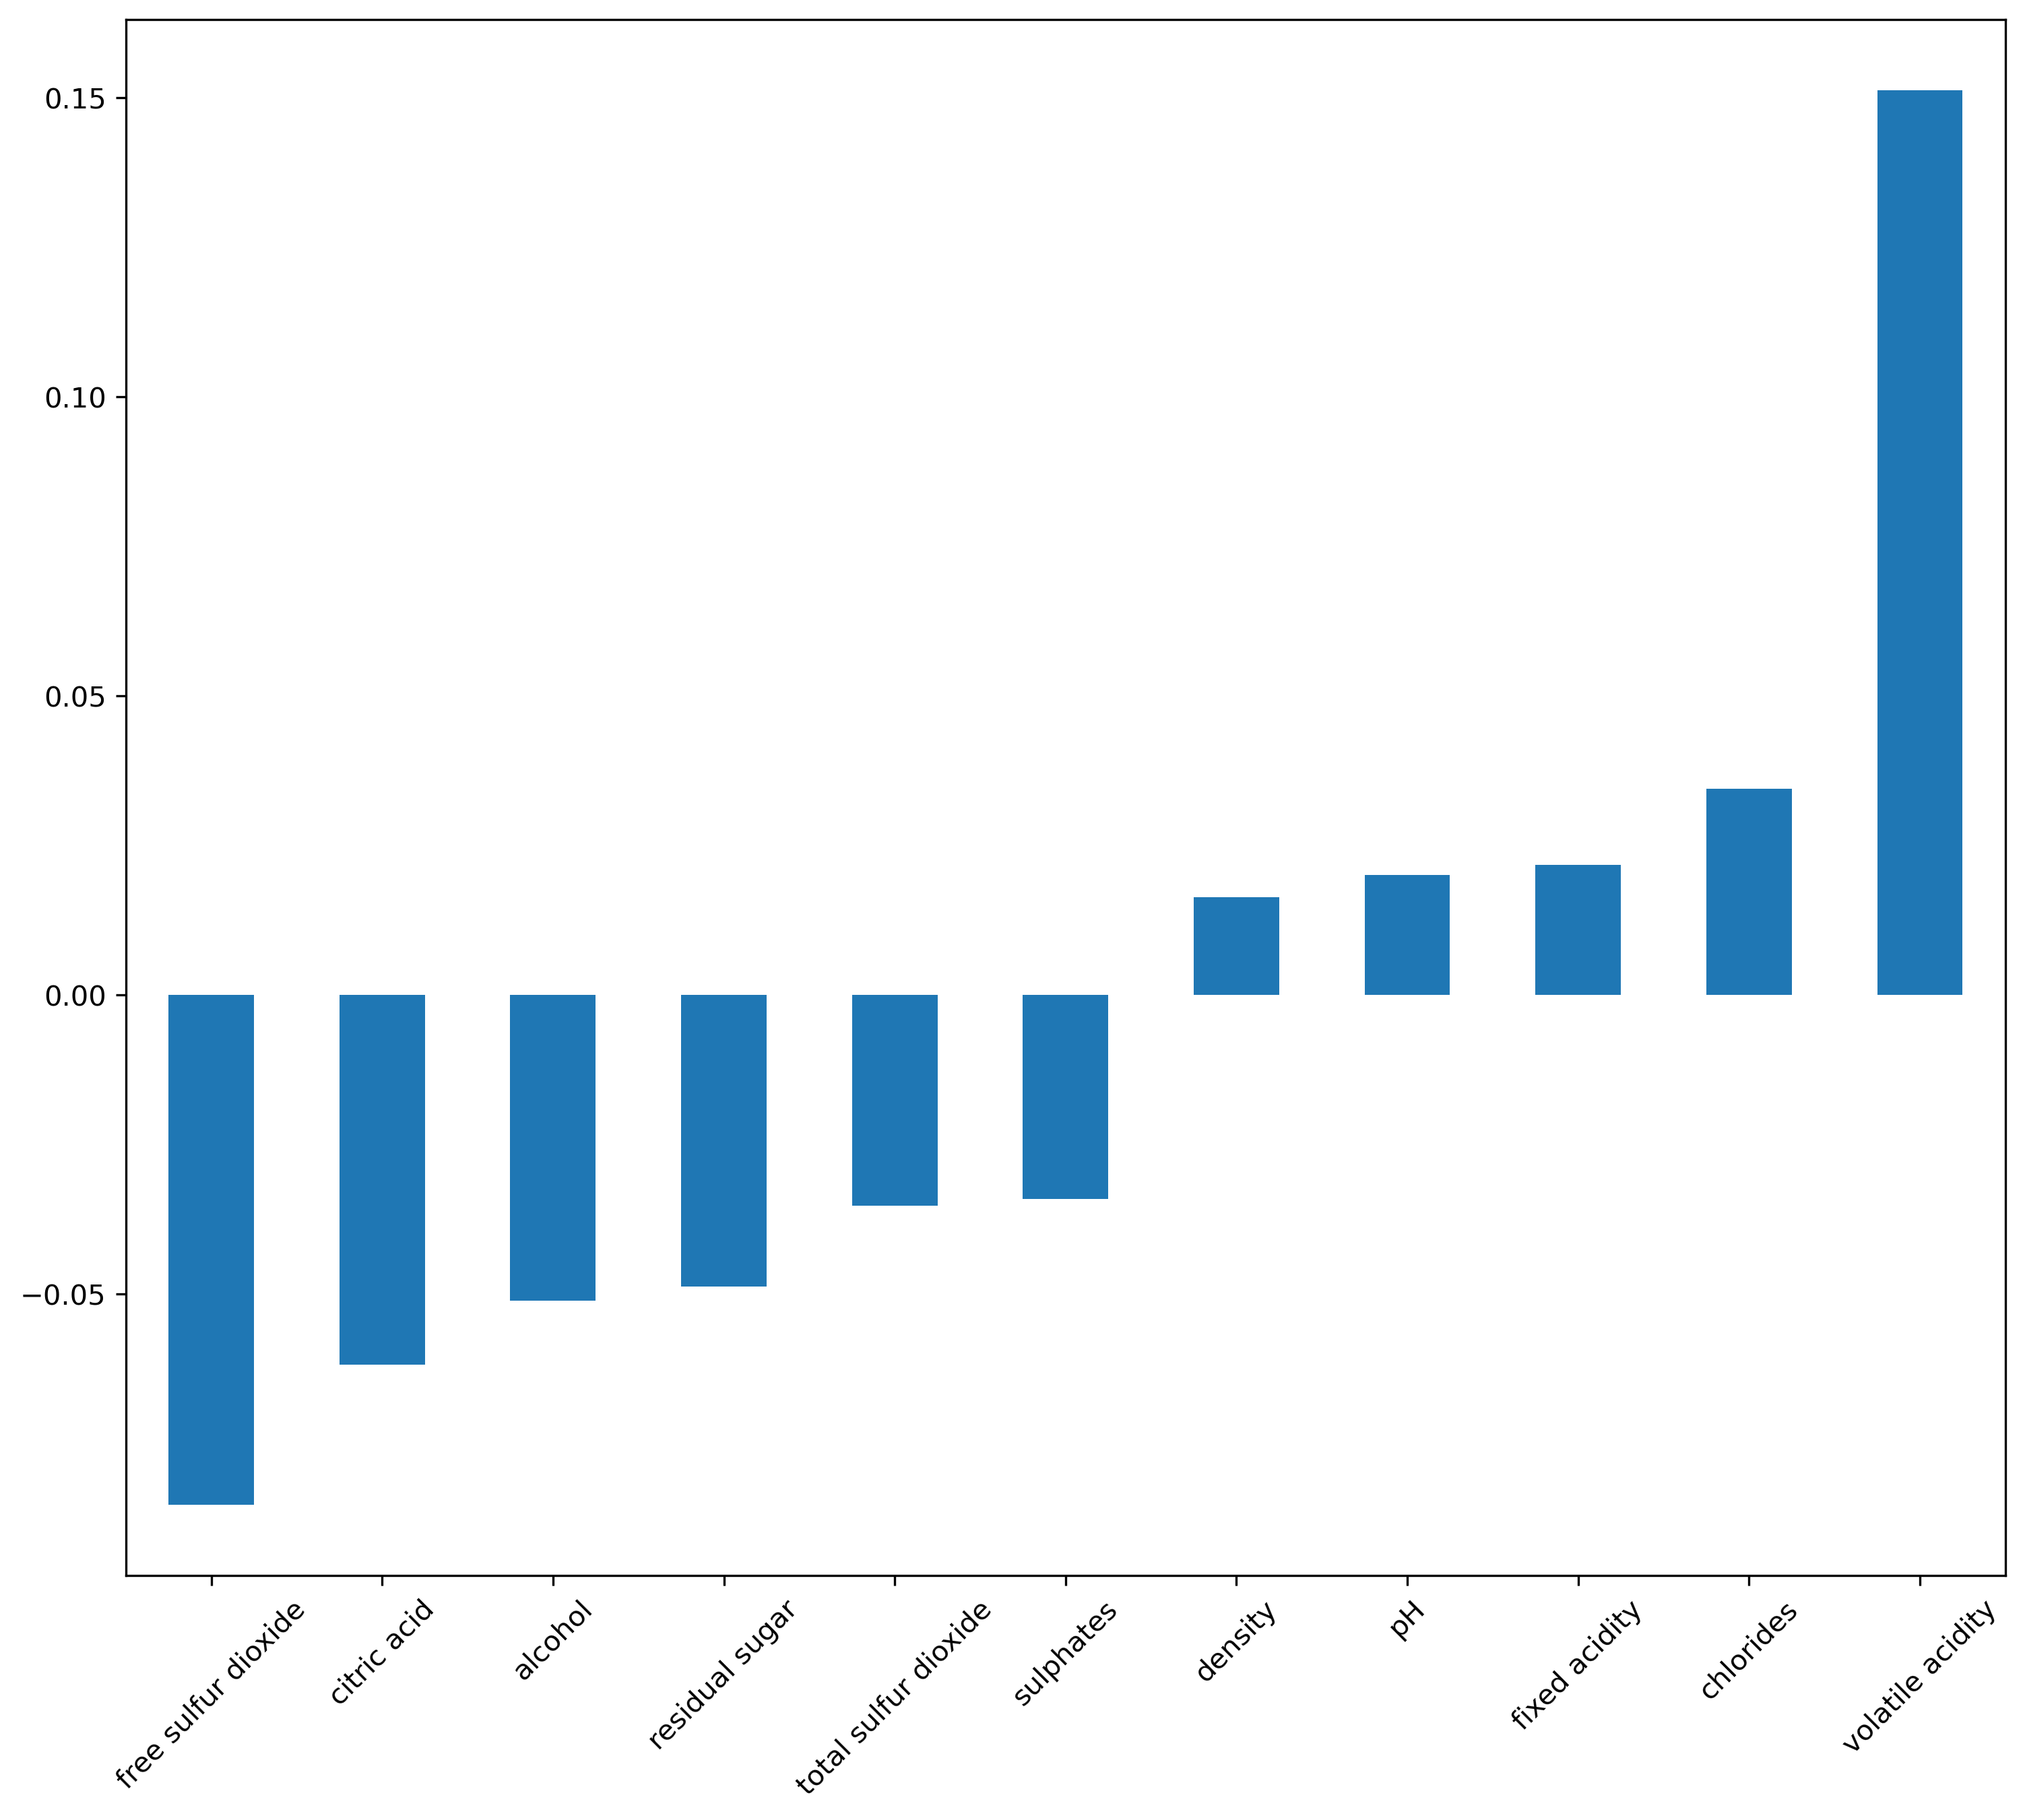

In [20]:
plt.figure(figsize=(12, 10), dpi=300)
correlation_matrix['Fraud'][:-1].sort_values().plot(kind='bar')
plt.xticks(rotation=45)
plt.savefig('../assets/visualization/correlation_barplot.png')

<Figure size 3600x1500 with 0 Axes>

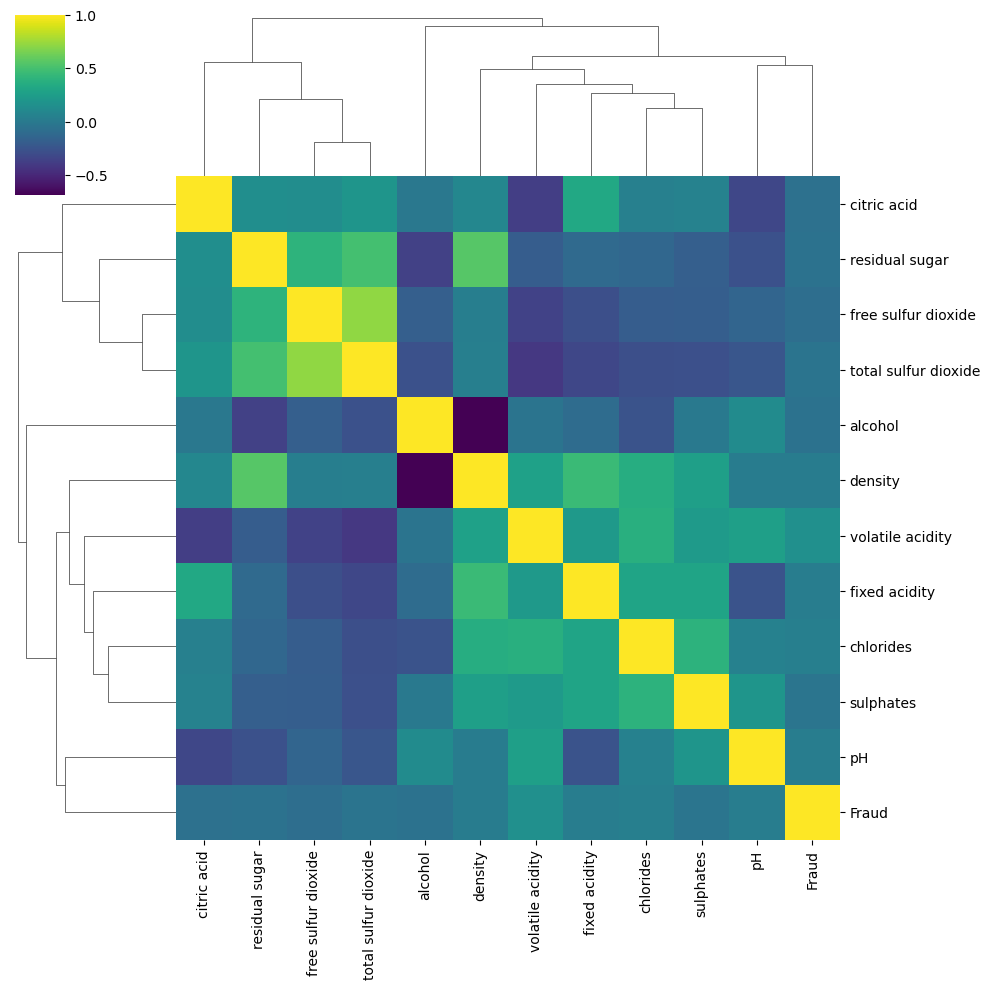

In [21]:
plt.figure(figsize=(12, 5), dpi=300)
sns.clustermap(correlation_matrix, cmap='viridis')
plt.savefig('../assets/visualization/correlation_clustermap.png')

In [22]:
df = df.drop('Fraud', axis=1)

In [23]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red


## Model building

In [24]:
# Encoding the string column type --> integer/dummies 
df['type'] = pd.get_dummies(df['type'], drop_first=True).astype(int)

In [25]:
# Legit --> 0
# Fraud --> 1
df['quality'] = df['quality'].map({'Legit': 0, 'Fraud': 1})

In [26]:
# Splitting the data into train, test --> 10% test size & 101 random state
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop('quality', axis=1)
y = df['quality']

In [28]:
X.shape, y.shape

((6497, 12), (6497,))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.discriminant_analysis import StandardScaler

# Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(class_weight='balanced'))
])

In [33]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 0.5, 0.75, 1],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto'],
    'classifier__degree': [1, 2, 3, 4, 5]
}

# Create the GridSearchCV object | Default cv=5, scoring=accuracy
grid_model = GridSearchCV(pipeline, param_grid=param_grid, n_jobs=-1)

In [34]:
# Fit grid model
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        SVC(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 0.5, 0.75, 1],
                         'classifier__degree': [1, 2, 3, 4, 5],
                         'classifier__gamma': ['scale', 'auto'],
                         'classifier__kernel': ['linear', 'rbf', 'poly']})

In [35]:
grid_model.best_params_

{'classifier__C': 0.001,
 'classifier__degree': 2,
 'classifier__gamma': 'scale',
 'classifier__kernel': 'poly'}

In [37]:
best_estimator = grid_model.best_estimator_
best_estimator.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('classifier',
   SVC(C=0.001, class_weight='balanced', degree=2, kernel='poly'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'classifier': SVC(C=0.001, class_weight='balanced', degree=2, kernel='poly'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__C': 0.001,
 'classifier__break_ties': False,
 'classifier__cache_size': 200,
 'classifier__class_weight': 'balanced',
 'classifier__coef0': 0.0,
 'classifier__decision_function_shape': 'ovr',
 'classifier__degree': 2,
 'classifier__gamma': 'scale',
 'classifier__kernel': 'poly',
 'classifier__max_iter': -1,
 'classifier__probability': False,
 'classifier__random_state': None,
 'classifier__shrinking': True,
 'classifier__tol': 0.001,
 'classifier__verbose': False}

In [38]:
# Save the best estimator
import joblib

In [39]:
joblib.dump(best_estimator, '../assets/model/best_svc_classifier.pkl')

['../assets/model/best_svc_classifier.pkl']

In [40]:
# Load the model
svc_classifier = joblib.load('../assets/model/best_svc_classifier.pkl')

In [42]:
svc_classifier.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 SVC(C=0.001, class_weight='balanced', degree=2,
                     kernel='poly'))])>

In [44]:
predictions = svc_classifier.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [46]:
accuracy_score(predictions, y_test)

0.9538461538461539

In [60]:
confusion_matrix = confusion_matrix(predictions, y_test)
confusion_matrix

array([[617,  24],
       [  6,   3]], dtype=int64)

<Figure size 3600x1800 with 0 Axes>

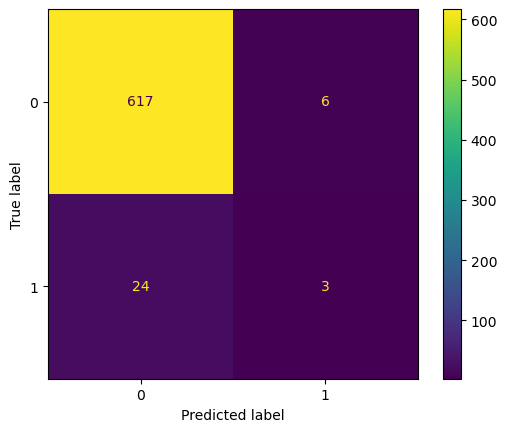

In [57]:
plt.figure(figsize=(12,6), dpi=300)
ConfusionMatrixDisplay.from_estimator(svc_classifier, X_test, y_test)
plt.savefig('../assets/visualization/svc_classifier_confusion_matrix.png')

In [59]:
c_report = classification_report(predictions, y_test)
print(c_report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       641
           1       0.11      0.33      0.17         9

    accuracy                           0.95       650
   macro avg       0.55      0.65      0.57       650
weighted avg       0.98      0.95      0.97       650

